In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('../data/telecom_churn.csv')

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному

## 1.1 Количественные

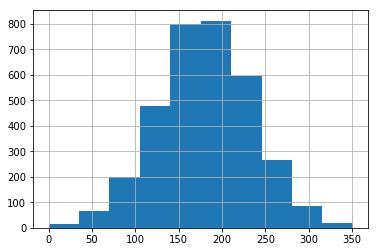

In [7]:
df['Total day minutes'].hist();

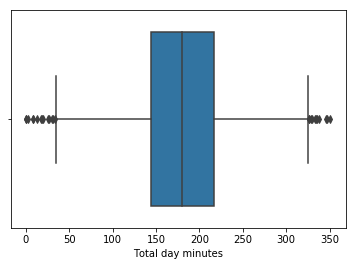

In [9]:
sns.boxplot(df['Total day minutes']);

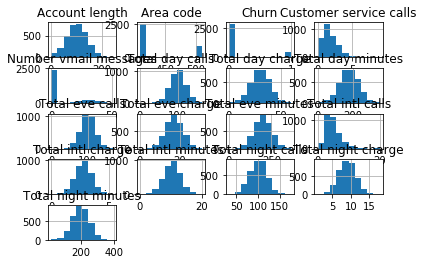

In [10]:
df.hist();

# 1.2 Категориал.

In [12]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OR     78
Name: State, dtype: int64

In [13]:
df['Churn'].value_counts().head()

False    2850
True      483
Name: Churn, dtype: int64

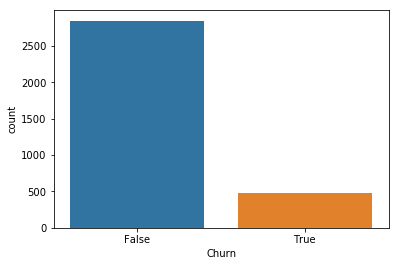

In [17]:
sns.countplot(df['Churn']);

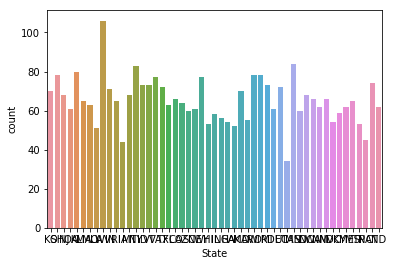

In [16]:
sns.countplot(df['State']);

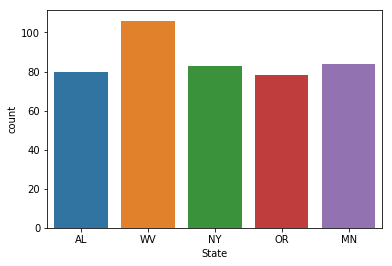

In [24]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

# 2 Взаимодействие
## 2.1 Колич-колич

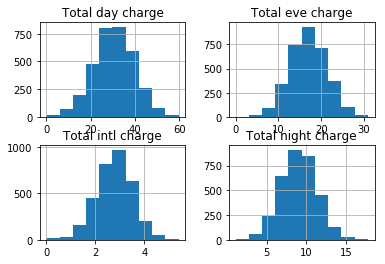

In [30]:
feat = [f for f in df.columns if 'charge' in f]

#df.columns
df[feat].hist();

In [28]:
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

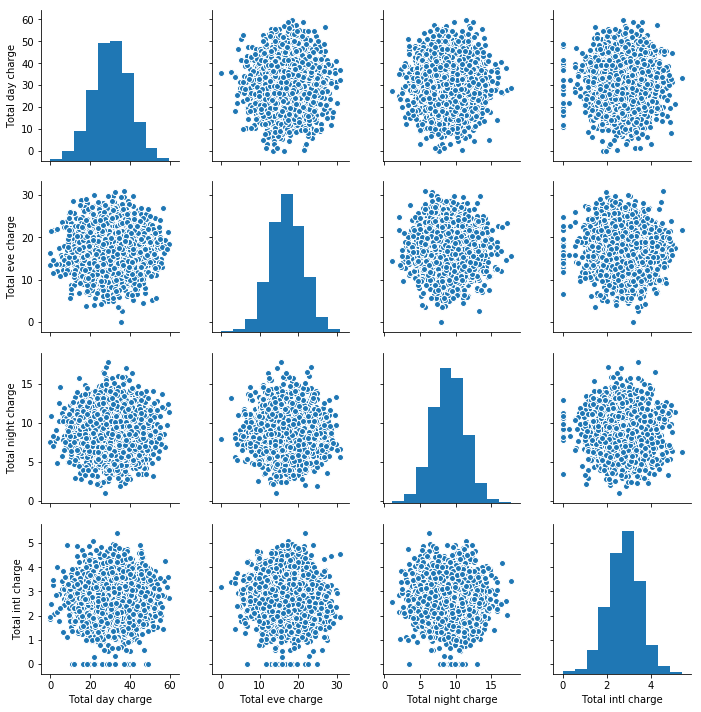

In [31]:
sns.pairplot(df[feat]);

In [40]:
df['Churn'].map({False: 'blue', True:'Orange'})

0         blue
1         blue
2         blue
3         blue
4         blue
5         blue
6         blue
7         blue
8         blue
9         blue
10      Orange
11        blue
12        blue
13        blue
14        blue
15      Orange
16        blue
17        blue
18        blue
19        blue
20        blue
21      Orange
22        blue
23        blue
24        blue
25        blue
26        blue
27        blue
28        blue
29        blue
         ...  
3303      blue
3304    Orange
3305      blue
3306      blue
3307      blue
3308      blue
3309      blue
3310      blue
3311      blue
3312      blue
3313      blue
3314      blue
3315      blue
3316      blue
3317      blue
3318      blue
3319      blue
3320    Orange
3321      blue
3322    Orange
3323    Orange
3324      blue
3325      blue
3326      blue
3327      blue
3328      blue
3329      blue
3330      blue
3331      blue
3332      blue
Name: Churn, Length: 3333, dtype: object

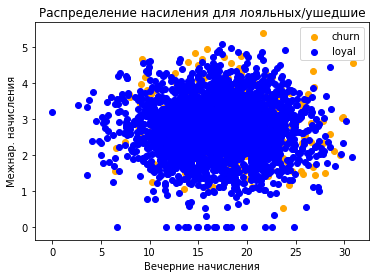

In [53]:
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'],
           color='orange', label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
            color='blue', label='loyal');
plt.xlabel('Вечерние начисления');
plt.ylabel('Межнар. начисления');
plt.title('Распределение насиления для лояльных/ушедшие');
plt.legend();